# Читаем данные

In [98]:
import pandas as pd
import numpy as np
import ast
import wfdb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [99]:
def load_signal_data_raw(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [100]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [101]:
path="Data/"
sampling_rate=100

In [102]:
# загружаем файл ptbxl_database.csv

data = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
data.scp_codes = data.scp_codes.apply(lambda x: ast.literal_eval(x))
data

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [103]:
# загружаем данные о сигналах

signal_data_raw = load_signal_data_raw(data, sampling_rate, path)

In [104]:
signal_data_raw

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [105]:
signal_data_raw.shape

(21837, 1000, 12)

In [106]:
# читаем файл scp_statements.csv

agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [107]:
agg_df

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [108]:
data['diagnostic_superclass'] = data.scp_codes.apply(aggregate_diagnostic)

In [109]:
data.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


## Посмотрим на некоторые кардиограммы

1-й пациент

In [110]:
signal_data_raw[0]

array([[-0.119, -0.055,  0.064, ..., -0.026, -0.039, -0.079],
       [-0.116, -0.051,  0.065, ..., -0.031, -0.034, -0.074],
       [-0.12 , -0.044,  0.076, ..., -0.028, -0.029, -0.069],
       ...,
       [ 0.069,  0.   , -0.069, ...,  0.024, -0.041, -0.058],
       [ 0.086,  0.004, -0.081, ...,  0.242, -0.046, -0.098],
       [ 0.022, -0.031, -0.054, ...,  0.143, -0.035, -0.12 ]])

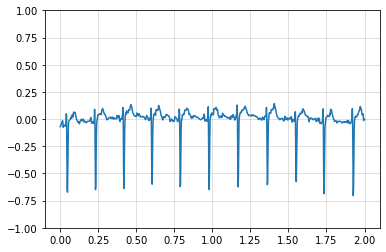

In [111]:
x = np.linspace(0,2,1000)
y = signal_data_raw[0,:1000, 6]
plt.plot(x,y, "-")
plt.ylim((-1,1))
plt.show()

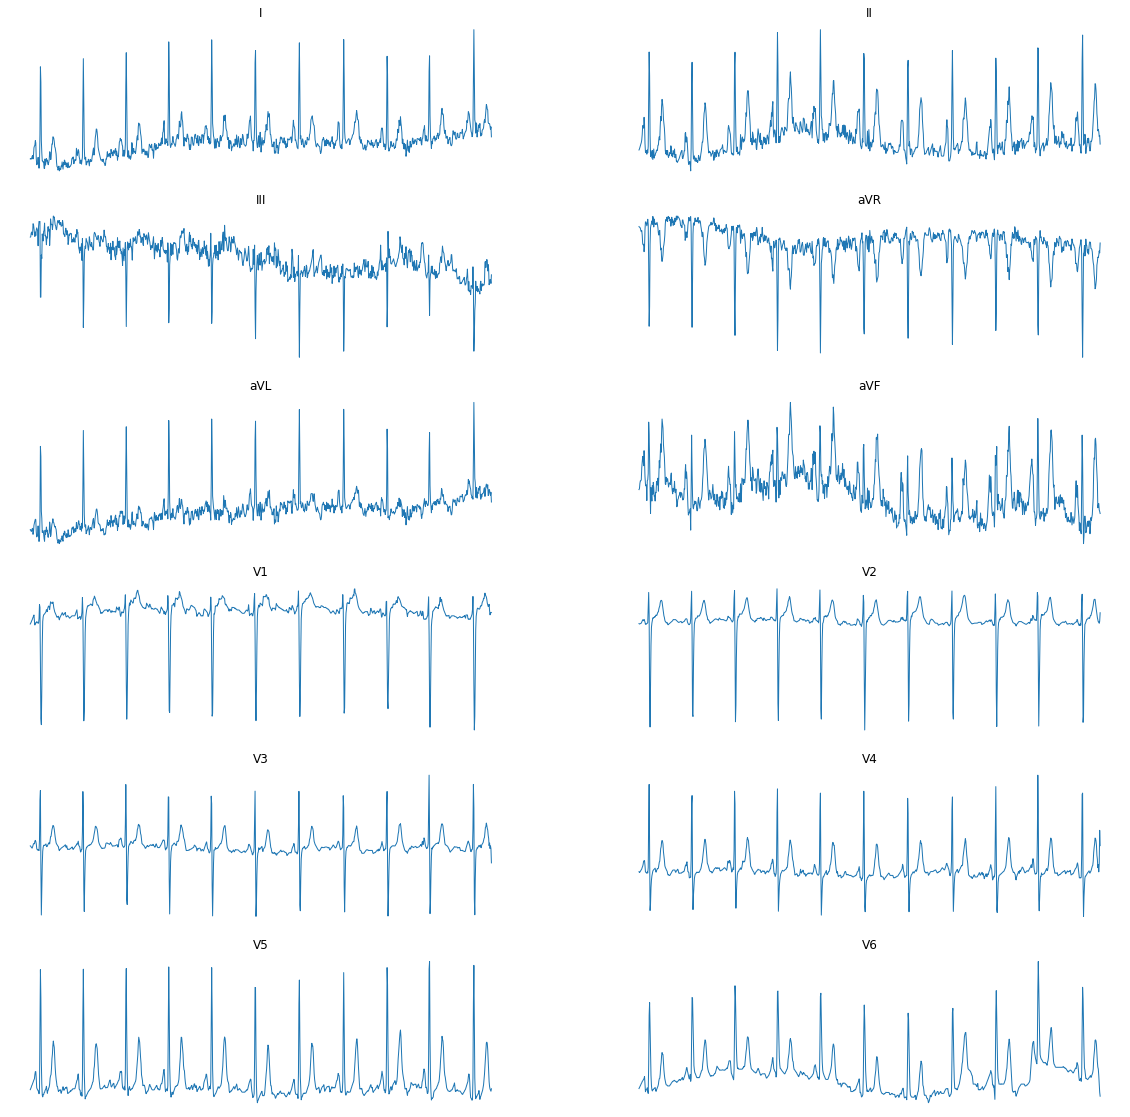

In [112]:
ecg = signal_data_raw[0]
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')

plt.show()

10000-й пациент

In [113]:
signal_data_raw[9999]

array([[ 0.029, -0.026, -0.055, ..., -0.07 ,  0.005,  0.145],
       [ 0.024, -0.031, -0.055, ..., -0.07 ,  0.005,  0.145],
       [ 0.027, -0.028, -0.055, ..., -0.07 ,  0.005,  0.145],
       ...,
       [-0.05 , -0.015,  0.035, ...,  0.104, -0.073, -0.167],
       [-0.056, -0.021,  0.035, ...,  0.108, -0.079, -0.181],
       [-0.051, -0.016,  0.035, ...,  0.114, -0.083, -0.172]])

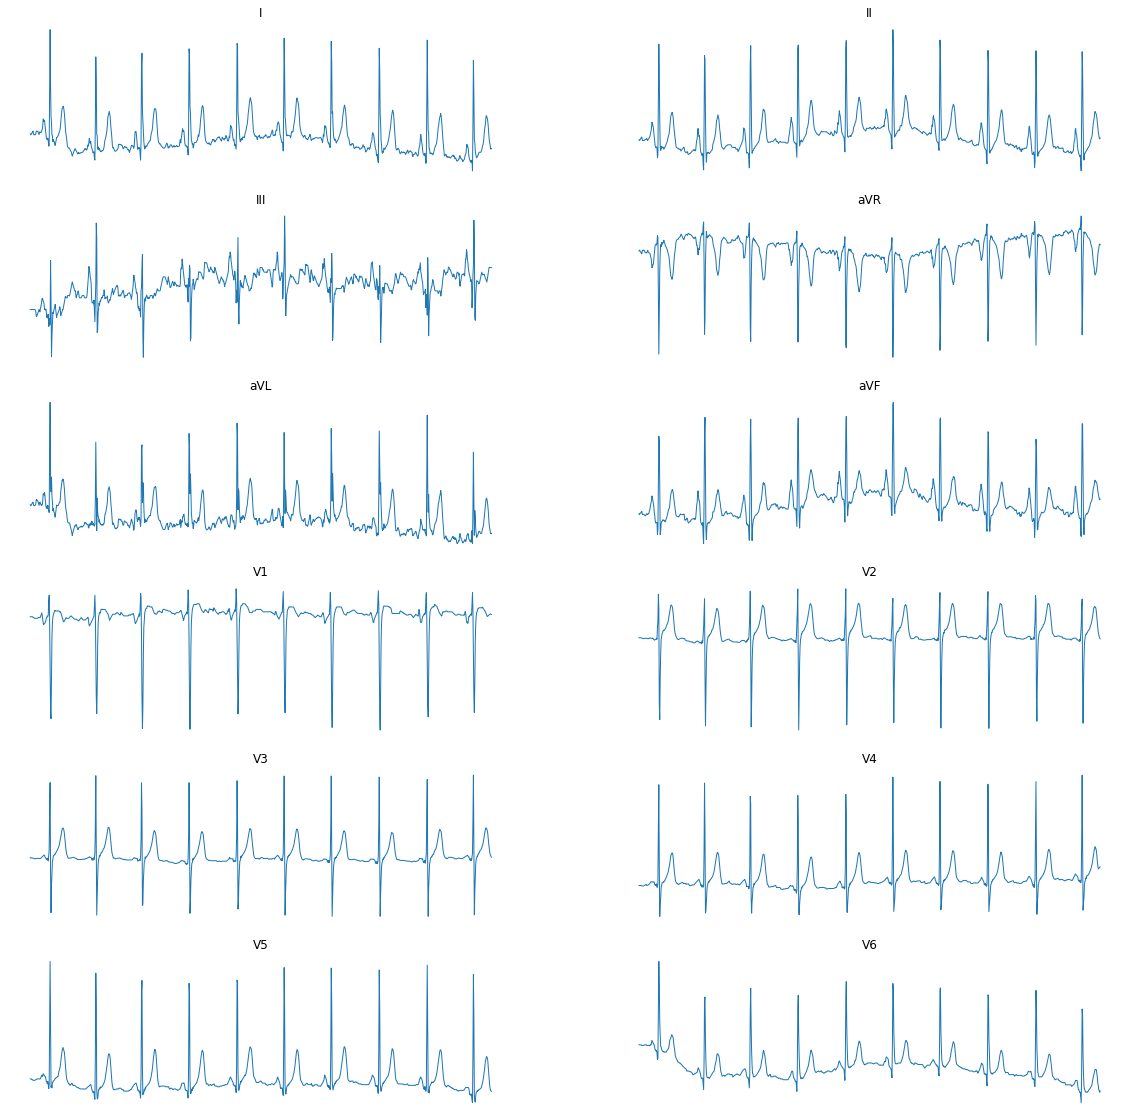

In [114]:
ecg = signal_data_raw[9999]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')

plt.show()

15500-й пациент

In [115]:
signal_data_raw[15499]

array([[ 0.391,  0.892,  0.501, ...,  0.285,  1.167,  1.321],
       [ 0.215,  0.285,  0.07 , ..., -0.116,  0.295,  0.479],
       [ 0.058, -0.037, -0.095, ..., -0.103, -0.094, -0.055],
       ...,
       [ 0.026,  0.031,  0.005, ...,  0.004,  0.012,  0.008],
       [ 0.024,  0.029,  0.005, ...,  0.01 ,  0.017,  0.013],
       [ 0.026,  0.031,  0.005, ...,  0.01 ,  0.021,  0.022]])

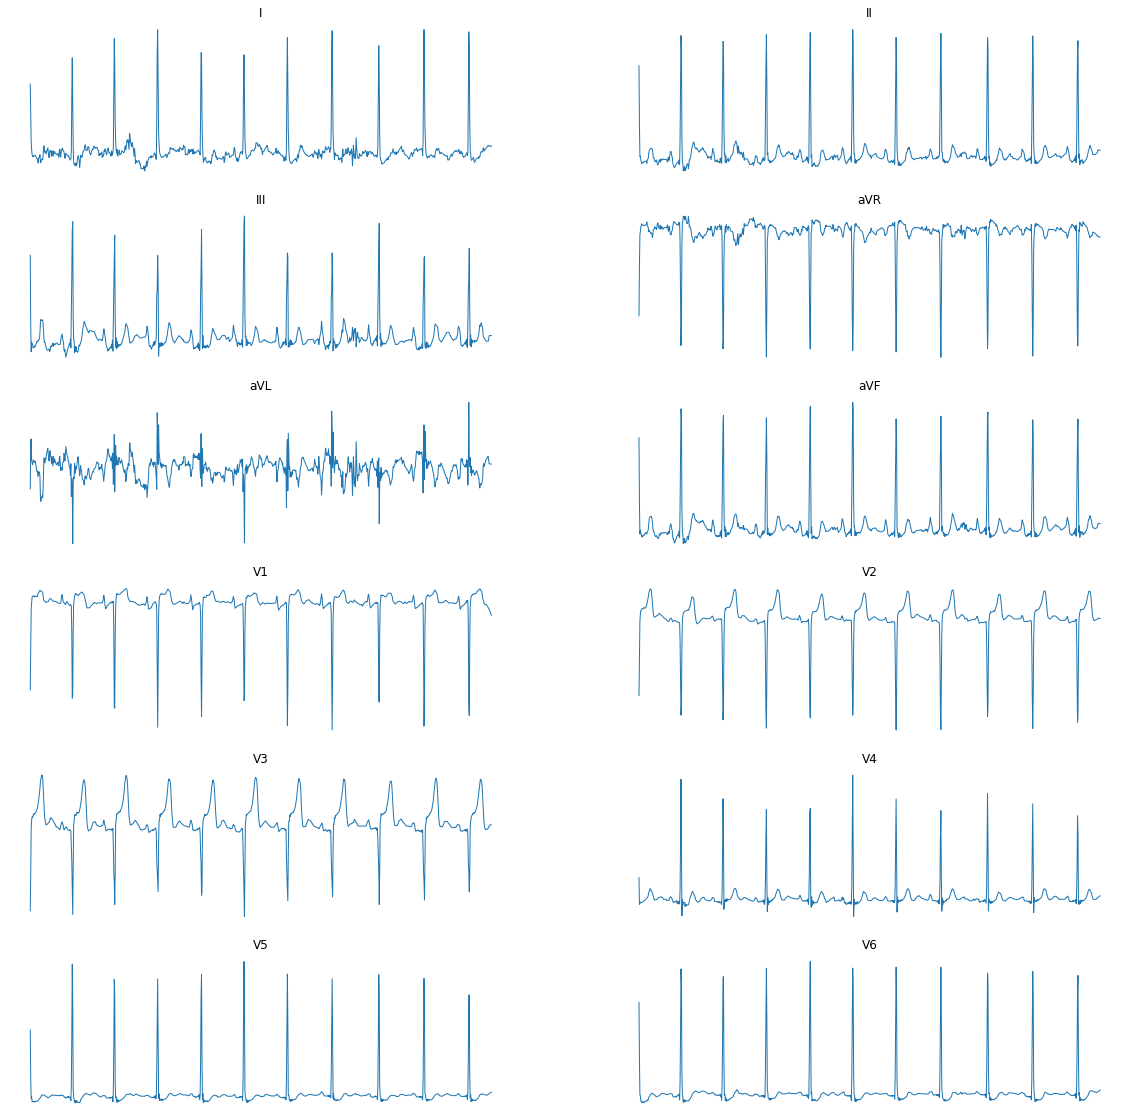

In [116]:
ecg = signal_data_raw[15499]
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (0.1,0.1)
plt.figure()
for index in range(12):
    plt.subplot(6,2,index+1)
    plt.plot(ecg[:,index], linewidth=1)
    
    plt.gca()
    plt.title(titles[index])
    plt.axis('off')

plt.show()

## Обработаем данные

In [117]:
data['diagnostic_superclass'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[NORM]                 9083
[MI]                   2538
[STTC]                 2406
[CD]                   1709
[MI, CD]               1302
[STTC, HYP]             783
[STTC, MI]              602
[HYP]                   536
[STTC, CD]              472
[NORM, CD]              407
[]                      407
[HYP, STTC, MI]         359
[HYP, CD]               300
[STTC, MI, CD]          223
[STTC, HYP, CD]         211
[HYP, MI]               179
[HYP, STTC, MI, CD]     156
[HYP, MI, CD]           113
[NORM, STTC]             28
[NORM, STTC, CD]          5
[MI, HYP, CD]             4
[MI, HYP]                 4
[MI, STTC, HYP]           3
[MI, STTC, HYP, CD]       2
[NORM, HYP, CD]           2
[NORM, HYP]               2
[NORM, HYP, MI, CD]       1
Name: diagnostic_superclass, dtype: int64

Можно заметить, что есть небольшое количество ЭКГ (407), у которых не указан искомый класс. Удалим эти строки.

In [118]:
data.shape

(21837, 28)

In [119]:
counter=0
index=1
signal_data=[]
while counter<data['diagnostic_superclass'].shape[0]:
    if data['diagnostic_superclass'].iat[counter]==[]:
        data=data.drop(labels=index,axis=0)        
    else:
        signal_data.append(signal_data_raw[index-1])
        counter=counter+1
    index=index+1

In [120]:
data.shape

(21430, 28)

In [121]:
signal_data=np.array(signal_data)

In [122]:
signal_data.shape

(21430, 1000, 12)

Дадим каждому классу заболеваний свой номер, чтобы работать с количественными признаками.


   0 - NORM     
   1 - MI    
   2 - STTC    
   3 - CD    
   4 - HYP    

In [123]:
superclass_code=np.array(data['diagnostic_superclass'])
superclass_code

array([list(['NORM']), list(['NORM']), list(['NORM']), ...,
       list(['STTC']), list(['NORM']), list(['NORM'])], dtype=object)

In [124]:
superclass_code = superclass_code.reshape(len(superclass_code), 1)

In [125]:
classes = np.array(['NORM', 'MI', 'STTC', 'CD', 'HYP'])

In [126]:
for index in range(len(superclass_code)):
    superclass_code[index] = np.where(classes == superclass_code[index][0][0])[0]

In [127]:
superclass_code = superclass_code.reshape(1, -1)[0]

In [128]:
superclass_code

array([0, 0, 0, ..., 2, 0, 0], dtype=object)

In [129]:
superclass_code=superclass_code.astype('int8')

In [130]:
superclass_code

array([0, 0, 0, ..., 2, 0, 0], dtype=int8)

In [131]:
data["superclass_code"]=superclass_code

In [132]:
data.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass,superclass_code
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM],0
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM],0
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM],0
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM],0
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM],0


## Визуализация данных и статистика

Посмотрим на количество пациентов в каждом классе

    0 - NORM    
    1 - MI
    2 - STTC
    3 - CD
    4 - HYP

In [133]:
data["superclass_code"].value_counts()

0    9528
2    4697
1    3853
3    1709
4    1643
Name: superclass_code, dtype: int64

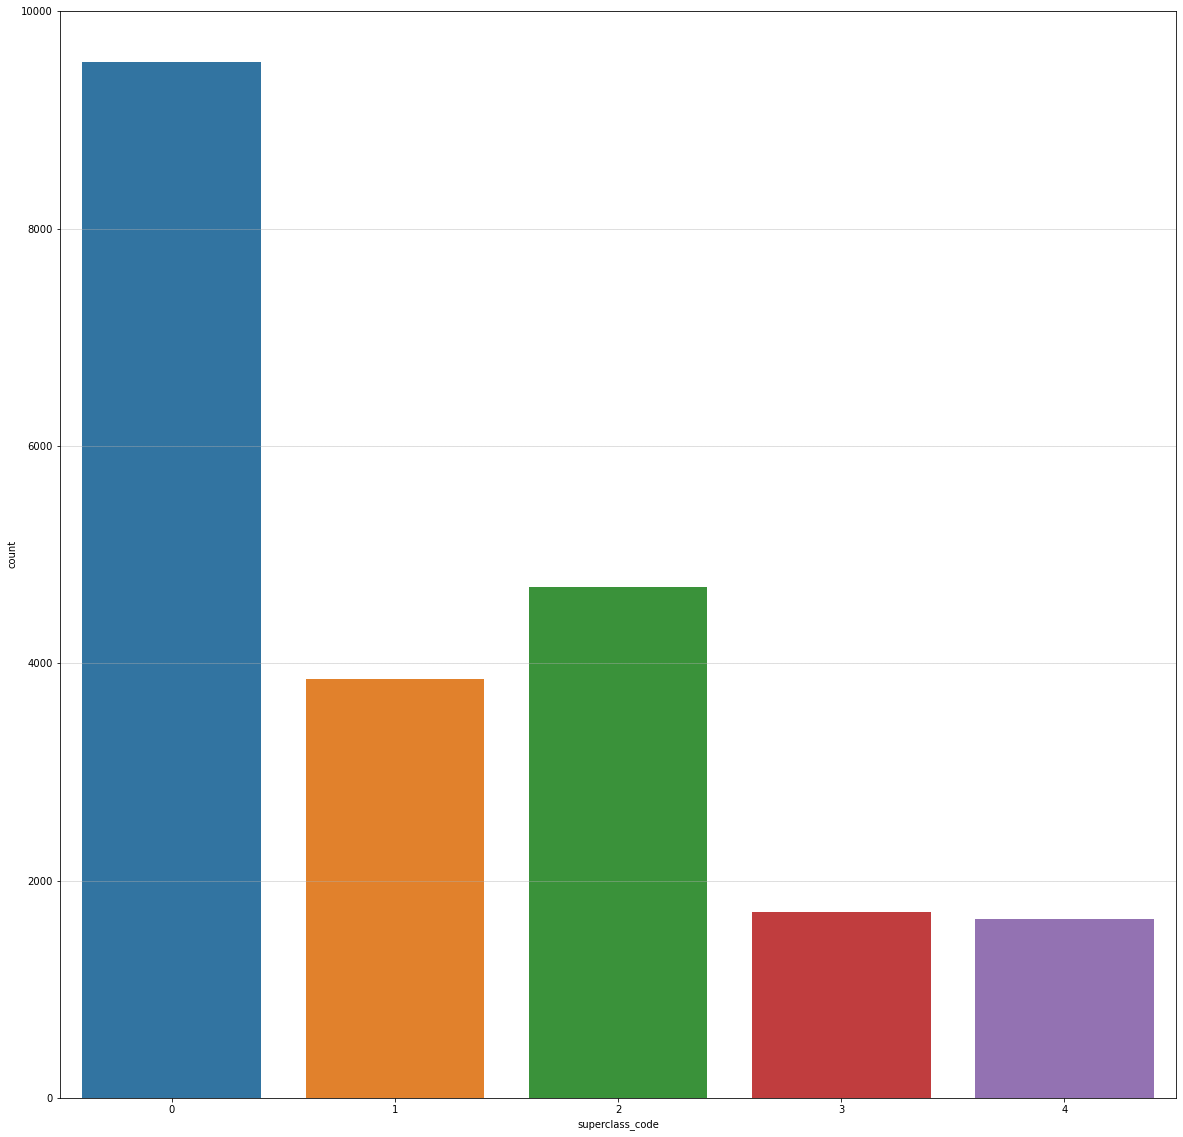

In [134]:
sns.countplot(x='superclass_code', data=data)
pass

Посмотрим на количество пациентов в разрезе пола в каждом классе

    0 - NORM    
    1 - MI
    2 - STTC
    3 - CD
    4 - HYP

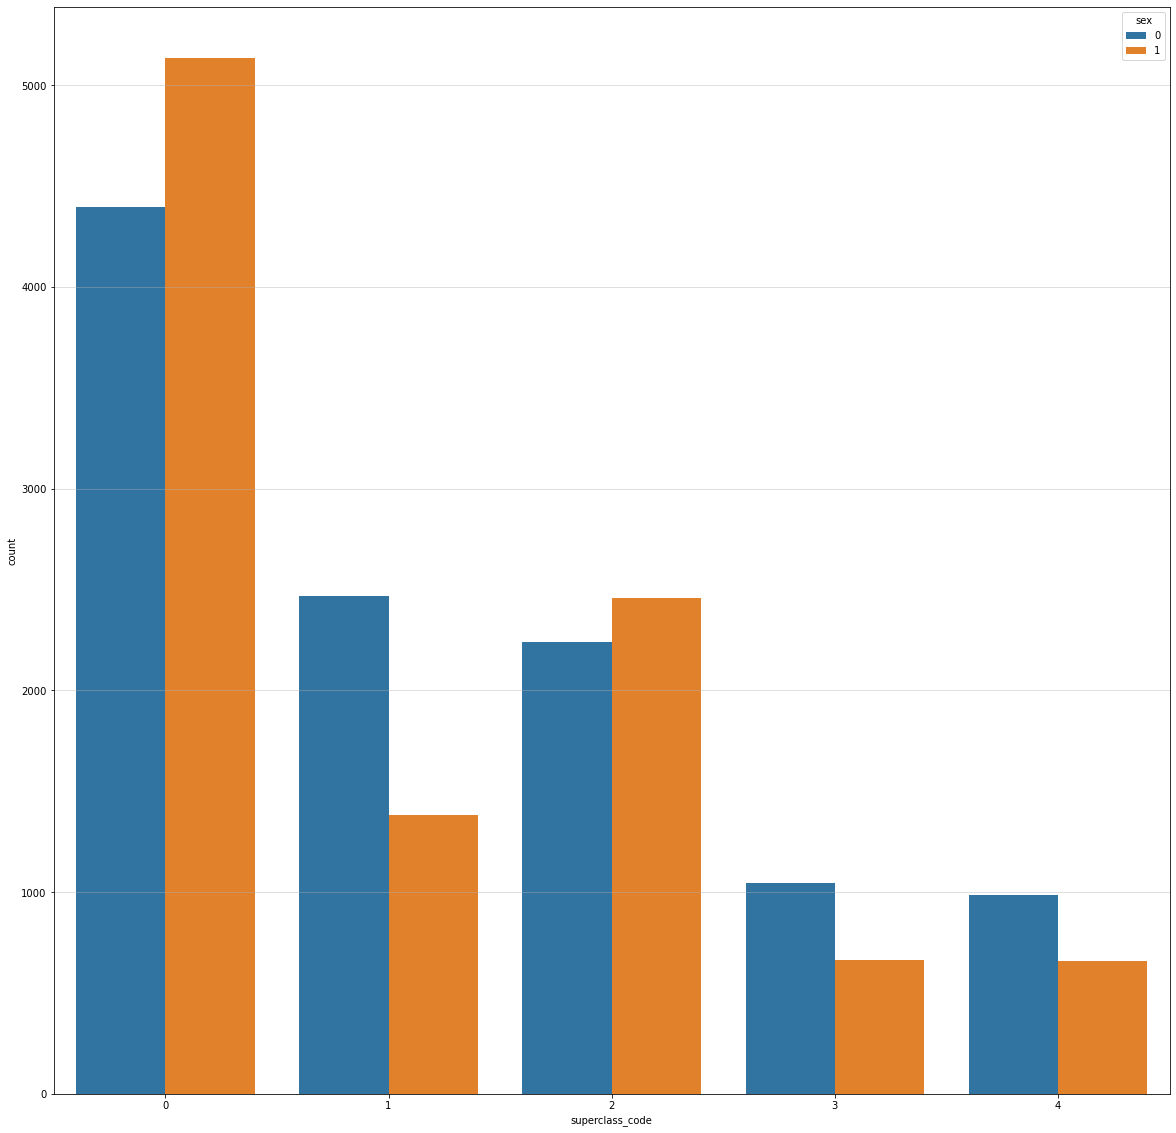

In [135]:
sns.countplot(x='superclass_code', hue='sex', data=data)
pass

Также посмотрим на зависимость веса от возраста

In [136]:
np.random.seed(42)                                                                    
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False) 

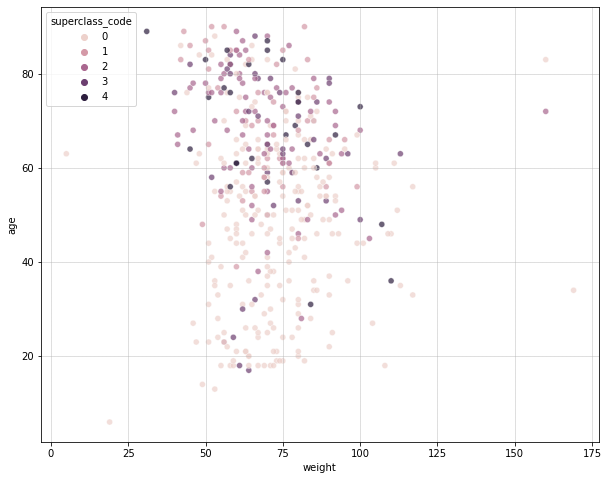

In [137]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='weight', y='age', hue='superclass_code', data=data.iloc[random_subset], alpha=0.7)
pass

## Разбиение на обучающую и тестовую выборки

In [138]:
signal_data=signal_data.reshape(signal_data.shape[0],12000)
signal_data.shape

(21430, 12000)

In [139]:
test_fold = 10
X_train = signal_data[np.where(data.strat_fold != test_fold)]
y_train = data[(data.strat_fold != test_fold)].superclass_code

X_test =signal_data[np.where(data.strat_fold == test_fold)]
y_test = data[data.strat_fold == test_fold].superclass_code

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(19267, 12000) (19267,) (2163, 12000) (2163,)


In [141]:
np.save('Train\X_train',X_train)
np.save('Train\y_train',y_train)
np.save('Test\X_test',X_test)
np.save('Test\y_test',y_test)